In [2]:
from tools import * 
import os

# XML 文件夹路径
in_folder = '../Exported_XML/MLJ/'
# 要保存的word文档路径
out_folder = '../Converted_Docx/'

# 读取所有的文档
all_files = os.listdir(in_folder)

# 将所有的XML数据读入内存 并写出到word文档中
all_data = {}
for each in all_files:
    data = get_text_part(in_folder + each)
    
    file_index = 'file_' + each[:-4]
    all_data[file_index] = data
    
    save_data_to_file(data, out_folder + each.replace('xml', 'docx'))

f:\program files\lib\site-packages\docx\styles\styles.py:54: UserWarning: style lookup by style_id is deprecated. Use style name as key instead.
  warn(msg, UserWarning)


In [ ]:
# 检查每种类型的主位编码是否有误
# 将下边代码注释解除，然后就可以查看不同的theme下都有哪些内容
'''
theme_to_check =  'textual'

for k in all_data:
    for a, b in all_data[k]:
        if theme_to_check in  b:
            print(k, '   ',  a, b)
''' 

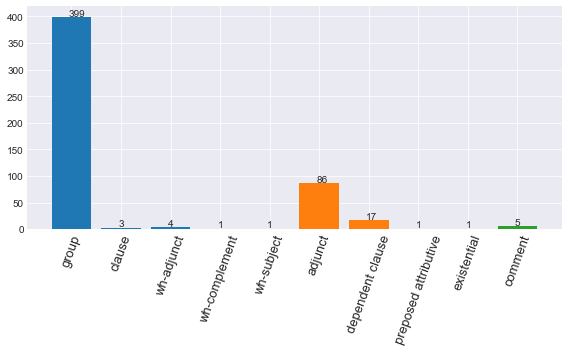

In [3]:
# 作图 主位类型和颜色设置
theme_types = ['group','clause' ,'wh-adjunct', 'wh-complement', 'wh-subject','adjunct','dependent_clause', 'preposed_attributive' ,'existential','comment' ]
colors = ['C0', 'C0', 'C0', 'C0', 'C0', 'C1', 'C1', 'C2' ,'C2', 'C2', 'C2']


from collections import Counter
type_counter = Counter()
for k in all_data:
    for a, b in all_data[k]:
        if not b == '':
            type_counter[b[-1]] += 1


import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline 

sns.set_style('darkgrid')
index = 0
plt.figure(figsize = (8, 5))

for k, c in zip(theme_types, colors):
    plt.bar(index, type_counter[k], color = c)
    plt.text(index - 0.05, type_counter[k] + 2, str(type_counter[k]))
    index += 1

plt.xticks(range(len(theme_types)), [x.replace('_', ' ') for x in theme_types], rotation = 70, fontsize = 13);
plt.tight_layout()
plt.savefig('graph.png', dpi = 100, transparent=False);

In [28]:
total_number = sum(type_counter.values()) 
for non_experiential in ['textual', 'something_else','interpersonal']:
    total_number -= type_counter[non_experiential]
    
print('Experiential Theme 的数量是{}'.format(total_number))

print()
print('其中：')
other_types = 1
for t in ('group', 'adjunct', 'dependent_clause'):
    print('{} 占的比重是{:.3f}'.format(t.replace('_', ' '), type_counter[t] / total_number))
    other_types -= type_counter[t] / total_number
print(' 其余的theme占的比重是{:.3f}'.format(other_types))

print('textual 数量是{}，与experiential相比比重是{:.3f}'.format(type_counter['textual'], type_counter['textual'] / total_number))
print('interpersonal 数量是{}，与experiential相比比重是{:.3f}'.format(type_counter['interpersonal'], type_counter['interpersonal'] / total_number))

Experiential Theme 的数量是518

其中：
group 占的比重是0.770
adjunct 占的比重是0.166
dependent clause 占的比重是0.033
 其余的theme占的比重是0.031
textual 数量是67，与experiential相比比重是0.129
interpersonal 数量是2，与experiential相比比重是0.004


In [10]:
# 给所有的数据添加词性标注
import nltk

# 先删除文件中一些特殊空格字符。
for k in all_data:
    for i,a in enumerate(all_data[k]):
        if '\xa0' in a[0]:
            all_data[k][i][0] = a[0].replace('\xa0', '')

def tag_the_themes(data):
    text = '  '.join([text for text, theme in data])
    tags = nltk.pos_tag(nltk.word_tokenize(text))
    return tags
    
def find_index_in_tagged(word_list, text_string, starting_pos = 0):
    current_pos = starting_pos
    check_str  = text_string.replace(' ', '')
    if check_str == '':
        return starting_pos, current_pos +1 
    current_str = ''
    while current_pos < len(word_list):
        current_str += word_list[current_pos]
        if current_str == check_str:
            return starting_pos, current_pos 
        else:
            current_pos += 1


from collections import defaultdict 
theme_type_tag = defaultdict(list)
for k in all_data.keys():
    data = all_data[k]
    tags = tag_the_themes(data)
    words_in_tagged = [w for w, t in tags] 
    themes_index = 0
    current_pos = 0
    while themes_index < len(data):
        t = data[themes_index][0]
        t_type =data[themes_index][1]
        if t_type == ['something_else']:
            themes_index += 1
            current_pos += len(t.replace(' ', ''))
            continue  
        try:
            start, end = find_index_in_tagged(words_in_tagged, t, starting_pos = current_pos)
        except:
            print(k)
            theme_type_tag.pop(k)
            break
        current_pos = end + 1
        themes_index += 1
        theme_type_tag[k].append([t, t_type, tags[start: end + 1]]) 

In [15]:
nouns = []
preps = []
verbs = []
adjs = []
for k in theme_type_tag.keys():
    for t, ty, tags in theme_type_tag[k]:
        if not ty == '' and ty[-1] == 'group':
            nouns += [word.lower() for word, tag in tags if 'NN' in tag]
            preps += [word.lower() for word, tag in tags if 'IN' in tag]
            verbs += [word.lower() for word, tag in tags if 'V' in tag]
            adjs += [word.lower() for word, tag in tags if 'JJ' in tag]
print(Counter(nouns).most_common(10))
print(Counter(preps).most_common(10))
print(Counter(verbs).most_common(10))
print(Counter(adjs).most_common(10))

[('study', 51), ('article', 27), ('findings', 26), ('results', 25), ('language', 18), ('learners', 13), ('analysis', 12), ('participants', 11), ('research', 11), ('l2', 10)]
[('of', 69), ('in', 14), ('for', 10), ('from', 10), ('on', 7), ('with', 6), ('as', 4), ('at', 2), ('over', 2), ('through', 1)]
[('learning', 4), ('’', 3), ('increasing', 2), ('associated', 1), ('language', 1), ('representing', 1), ('reflect', 1), ('keyboarding', 1), ('teaching', 1), ('shed', 1)]
[('second', 8), ('chinese', 4), ('experimental', 3), ('mixed', 3), ('empirical', 3), ('previous', 3), ('present', 3), ('other', 3), ('linguistic', 3), ('first', 2)]


In [16]:
# noun groups using 'and' 
and_counter = 0
for k in theme_type_tag.keys():
    for t, ty, tags in theme_type_tag[k]:
        if not ty == '' and ty[-1] == 'group':
            words = [word.lower() for word, tag in tags]
            if 'and' in words:
                and_counter += 1
print('and 出现在group theme 中有{}次'.format(and_counter))

and 出现在group theme 中有34次


In [23]:
# Adjunct initials 
adjunct_initials  = []
for k in theme_type_tag.keys():
    for t, ty, tags in theme_type_tag[k]:
        if not ty == '' and ty[-1] == 'adjunct':
            w_t = [[word.lower(), tag] for word, tag in tags]
            adjunct_initials.append(w_t[0])
print('most common types :')
print(Counter([t for w, t in adjunct_initials]).most_common(4))
print(Counter([w for w, t in adjunct_initials]).most_common(10))

most common types :
[('IN', 57), ('VBG', 13), ('RB', 5), ('VBN', 4)]
[('in', 31), ('drawing', 4), ('at', 4), ('by', 3), ('as', 3), ('to', 3), ('using', 3), ('beyond', 2), ('given', 2), ('through', 2)]


In [27]:
dependent_clause_initial  = []
for k in theme_type_tag.keys():
    for t, ty, tags in theme_type_tag[k]:
        if not ty == '' and ty[-1] == 'dependent_clause':
            w_t = [[word.lower(), tag] for word, tag in tags]
            dependent_clause_initial.append(w_t[0])
print(Counter([w for w, t in dependent_clause_initial]).most_common(10))

[('as', 5), ('while', 5), ('although', 3), ('even', 1), ('whereas', 1), ('given', 1), ('because', 1)]


In [29]:
mark_unmark_k = {}

for k in all_data:
    mark_counter = 0
    un_mark_counter = 0
    for a, b in all_data[k]:
        if  'marked' in  b:
            mark_counter += 1
        elif 'unmarked' in b:
            un_mark_counter += 1
    mark_unmark_k[k] = (mark_counter, un_mark_counter)


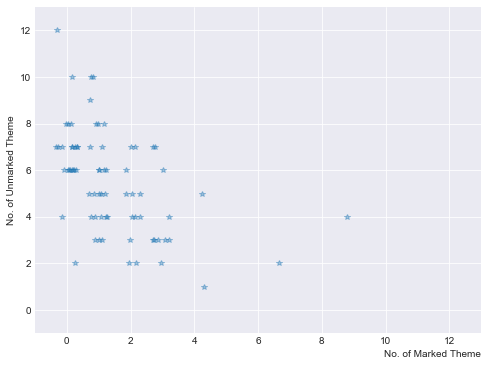

In [30]:
import random 
plt.figure(figsize = (8, 6))
for k in mark_unmark_k.keys():
    x = random.randrange(-100, 100)
    plt.plot(mark_unmark_k[k][0] + x / 300, mark_unmark_k[k][1], ls = '', marker = '*', ms = 6, alpha = 0.4, color = 'C0')
# plt.plot((-1, 13) ,(-1, 13), color = 'C1', ls = '-')
plt.xlim(-1, 13);
plt.ylim(-1, 13);
plt.xlabel('No. of Marked Theme',horizontalalignment='right', x=1.0);
plt.ylabel('No. of Unmarked Theme');
plt.savefig('graph-mark-unmark.png', dpi = 100, transparent=False);

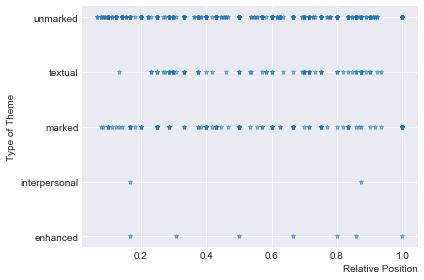

In [31]:
theme_and_position = []
for k in all_data:
    themes = [b  for a, b in all_data[k] if not b == ['something_else'] and not b == '' ]
    for i,t in enumerate(themes):
        theme_and_position.append((t[1],(i+1)/ len(themes)))
cat = [a for a,b in theme_and_position]
pos = [b for a,b in theme_and_position]
plt.figure(figsize = (6, 4))
plt.plot( pos, cat, ls = '', marker = '*', alpha = 0.5, ms = 5) ;   

plt.xlabel('Relative Position',horizontalalignment='right', x=1.0);
plt.ylabel('Type of Theme');
plt.tight_layout()
plt.savefig('graph-theme-position.png', dpi = 100, transparent=False);